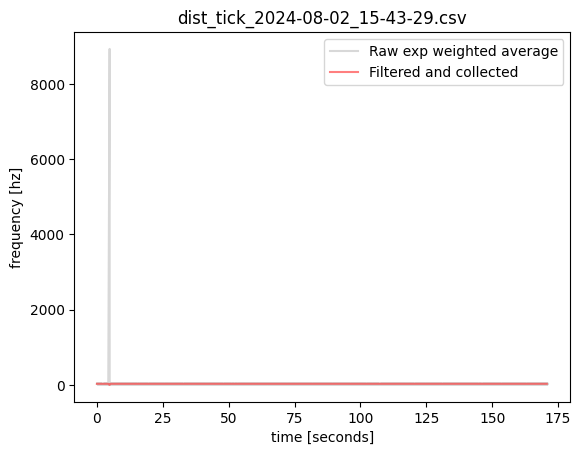

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

files_dir = '/Users/thomas/Desktop/ok/'

for _, __, files in os.walk(files_dir):

    files = sorted([x for x in files if (('unprocessed' not in x) and ('tick' in x))])

    for file in files:

        file_path = files_dir + file

        df = pd.read_csv(file_path.replace('.csv', '_unprocessed.csv'), names=['time'])
        df['frequency'] = 1/(df['time'].diff().shift(-1)) * 1e9
        df['time_sec'] = (df['time']-df.time[0])/1e9/60
        df2 = pd.read_csv(file_path, names=['time', 'frequency'])
        df2['time_sec'] = (df2['time']-df2.time[0])/1e9/60
        
        # df = df[df.frequency < 1000]
        # df = df[df.frequency > 10]

        # df = df[df.time_sec > 250]
        # df = df[df.time_sec < 300]
        # df2 = df2[df2.time_sec > 250]
        # df2 = df2[df2.time_sec < 300]

        #plt.ylim([25,35])

        plt.plot(df.time_sec, df.frequency, color='tab:grey', alpha=0.3, label='Raw exp weighted average')
        plt.plot(df2.time_sec, df2.frequency, alpha=0.5, color='red', label='Filtered and collected')
        plt.title(file)# + f' - {len(df2)} points')
        plt.xlabel('time [seconds]')
        plt.ylabel('frequency [hz]')
        plt.legend()
        plt.show()